**Univariate Analysis (Single Feature Analysis)**<br>

Objective: Understand the distribution and characteristics of a single feature using histograms boxplots, and violin plots.<br>

Dataset: Use the Iris dataset or any dataset with multiple numerical features.


Title: Histogram<br>

Task 1: Plot a histogram of the petal length feature.

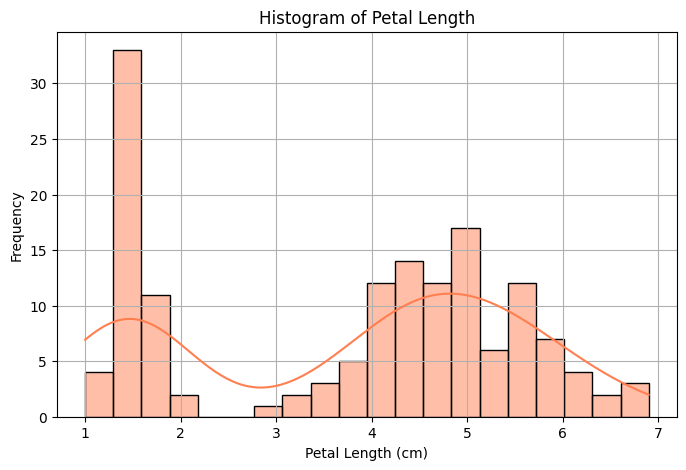

In [66]:
import seaborn as sns
import matplotlib.pyplot as plt

# Load example dataset (Iris)
iris = sns.load_dataset('iris')

# Plot histogram of petal length
plt.figure(figsize=(8, 5))
sns.histplot(iris['petal_length'], bins=20, kde=True, color='coral')
plt.title('Histogram of Petal Length')
plt.xlabel('Petal Length (cm)')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()


Title: Boxplots<br>

Task 2: Plot a boxplot of the petal length feature.

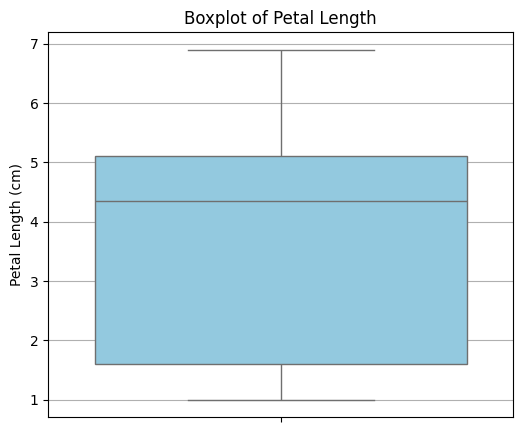

In [67]:
# Write your code from here
import seaborn as sns
import matplotlib.pyplot as plt

# Load the Iris dataset
iris = sns.load_dataset('iris')

# Plot boxplot of petal length
plt.figure(figsize=(6, 5))
sns.boxplot(y=iris['petal_length'], color='skyblue')
plt.title('Boxplot of Petal Length')
plt.ylabel('Petal Length (cm)')
plt.grid(True, axis='y')
plt.show()


Title: Violin Plots<br>

Task 3: Plot a violin plot of the petal length feature.

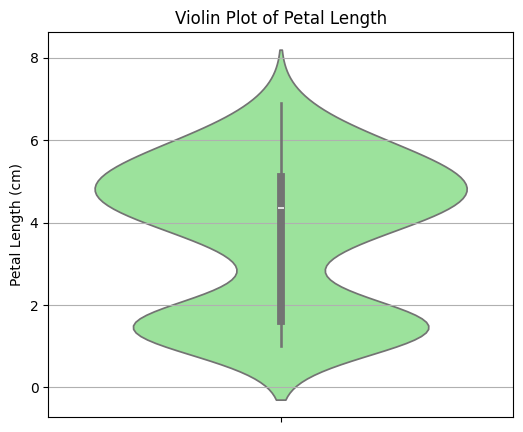

In [68]:
# Write your code from here
import seaborn as sns
import matplotlib.pyplot as plt

# Load Iris dataset
iris = sns.load_dataset('iris')

# Plot violin plot of petal length
plt.figure(figsize=(6, 5))
sns.violinplot(y=iris['petal_length'], color='lightgreen')
plt.title('Violin Plot of Petal Length')
plt.ylabel('Petal Length (cm)')
plt.grid(True, axis='y')
plt.show()


**Bivariate Analysis (Relationships Between Features)**<br>

Objective: Explore relationships between two features using scatter plots and correlation heatmaps.

Title: Scatter Plots<br>

Task 1: Create a scatter plot between sepal length and sepal width.<br>
Task 2: Scatter plot between petal length and petal width.<br>
Task 3: Scatter plot between sepal length and petal length.<br>

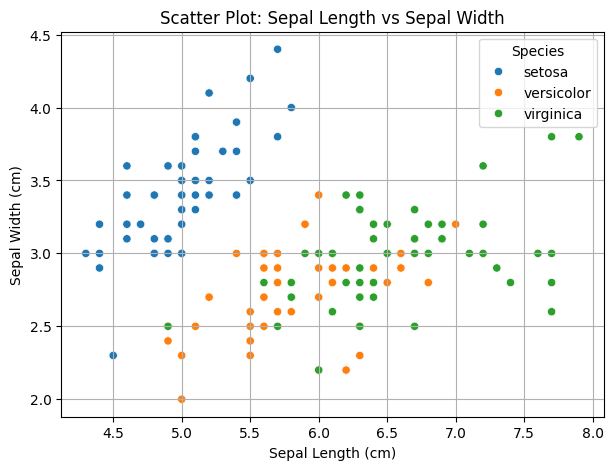

In [69]:
# Write your code from here
import seaborn as sns
import matplotlib.pyplot as plt

# Load dataset
iris = sns.load_dataset('iris')

# Scatter plot
plt.figure(figsize=(7, 5))
sns.scatterplot(x='sepal_length', y='sepal_width', data=iris, hue='species')
plt.title('Scatter Plot: Sepal Length vs Sepal Width')
plt.xlabel('Sepal Length (cm)')
plt.ylabel('Sepal Width (cm)')
plt.legend(title='Species')
plt.grid(True)
plt.show()


Title: Correlation Heatmaps<br>

Task 1: Generate a correlation heatmap of the dataset.<br>
Task 2: Highlight correlation between sepal length and petal length.<br>
Task 3: Highlight correlation between petal width and petal length.<br>

In [70]:
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

# Load Iris dataset
iris = sns.load_dataset('iris')

# Compute correlation matrix
corr = iris.corr()

# Create a mask to highlight specific correlations
mask = np.zeros_like(corr, dtype=bool)

# Highlight only sepal length & petal length, petal width & petal length
mask[1, 2] = True  # sepal_length & petal_length (row 1, col 2)
mask[2, 1] = True  # symmetric
mask[3, 2] = True  # petal_width & petal_length (row 3, col 2)
mask[2, 3] = True  # symmetric

plt.figure(figsize=(8, 6))

# Plot full heatmap with annotations
sns.heatmap(corr, annot=True, cmap='coolwarm', fmt=".2f", center=0,
            linewidths=0.5, linecolor='gray')

# Overlay rectangles to highlight the two correlations
for (i, j) in [(1, 2), (3, 2)]:
    plt.gca().add_patch(plt.Rectangle((j, i), 1, 1, fill=False, edgecolor='gold', lw=3))

plt.title('Correlation Heatmap with Highlights')
plt.show()
             

ValueError: could not convert string to float: 'setosa'

**Multivariate Analysis (Higher-Dimensional Data Relationships)**<br>
Objective: Analyze relationships in higher-dimensional data using pair plots and PCA.

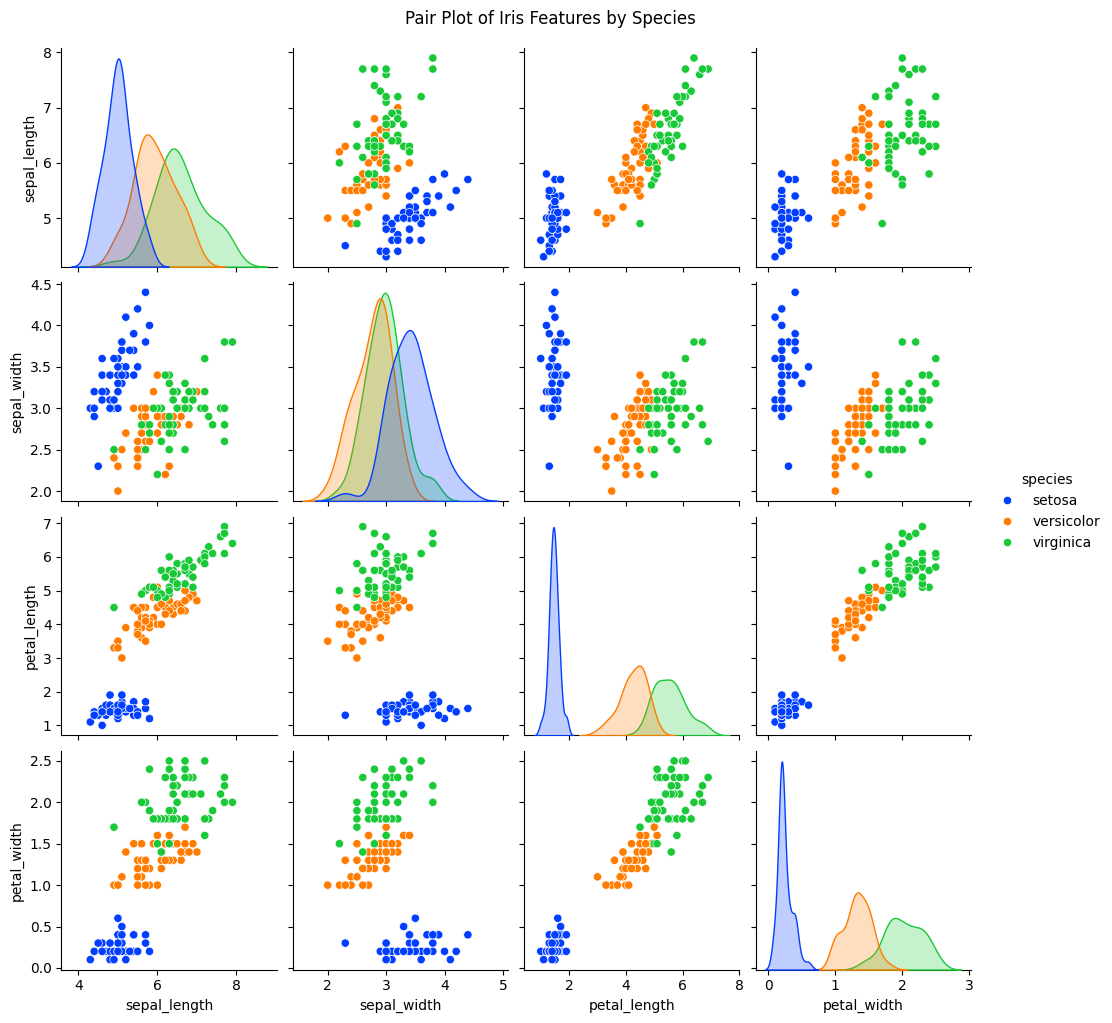

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Load dataset
iris = sns.load_dataset('iris')

# Pair plot of all numeric features with hue for species
sns.pairplot(iris, hue='species', palette='bright')
plt.suptitle('Pair Plot of Iris Features by Species', y=1.02)
plt.show()


Title: Pair Plots<br>

Task 1: Create a pair plot for the Iris dataset.<br>
Task 2: Focus on a subset of features (e.g., only petal dimensions).<br>
Task 3: Exclude one class to observe differences.

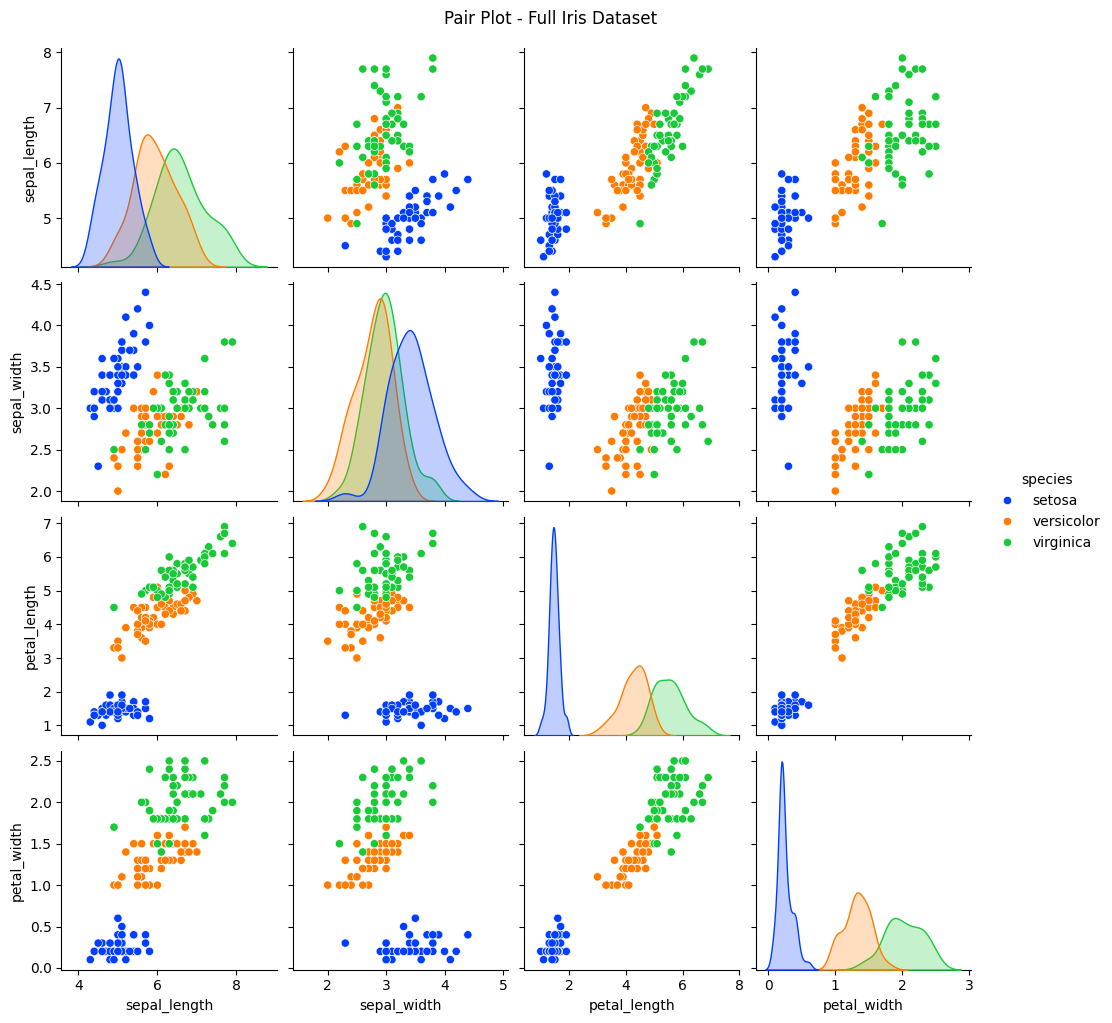

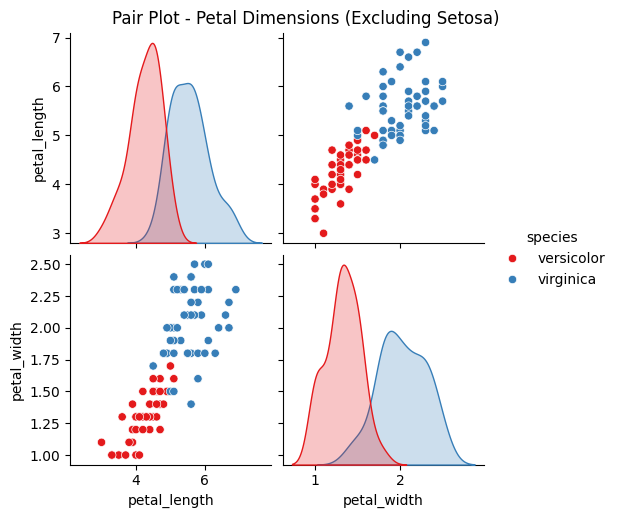

In [ ]:
# Write your code from here
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

# Load the Iris dataset
iris = sns.load_dataset('iris')

# Task 3: Exclude one class, e.g., 'setosa'
iris_subset = iris[iris['species'] != 'setosa']

# Task 1: Pair plot for the full dataset
sns.pairplot(iris, hue='species', palette='bright')
plt.suptitle('Pair Plot - Full Iris Dataset', y=1.02)
plt.show()

# Task 2: Pair plot for petal dimensions only (petal_length, petal_width)
sns.pairplot(iris_subset, vars=['petal_length', 'petal_width'], hue='species', palette='Set1')
plt.suptitle('Pair Plot - Petal Dimensions (Excluding Setosa)', y=1.02)
plt.show()


Title: Principal Component Analysis (PCA)<br>

Task 1: Perform PCA and plot the first two principal components.<br>
Task 2: Visualize explained variance by each component.<br>
Task 3: Retain more components and visualize in 3D.

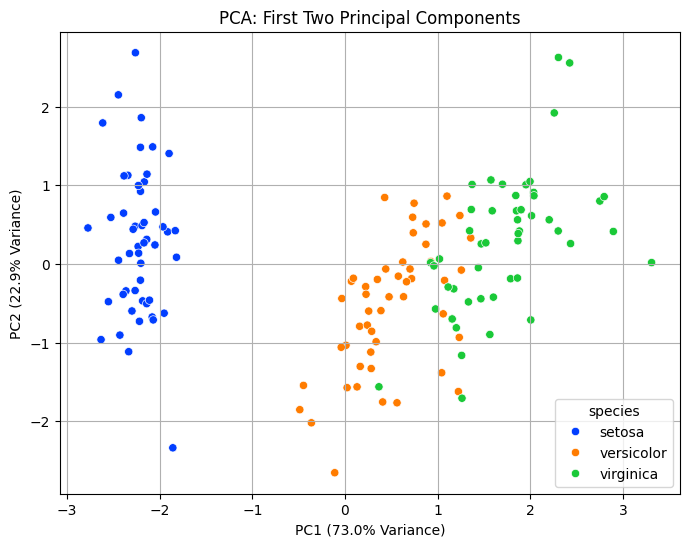

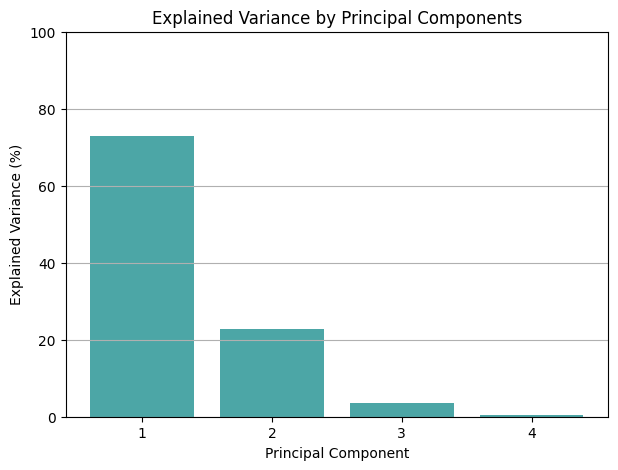

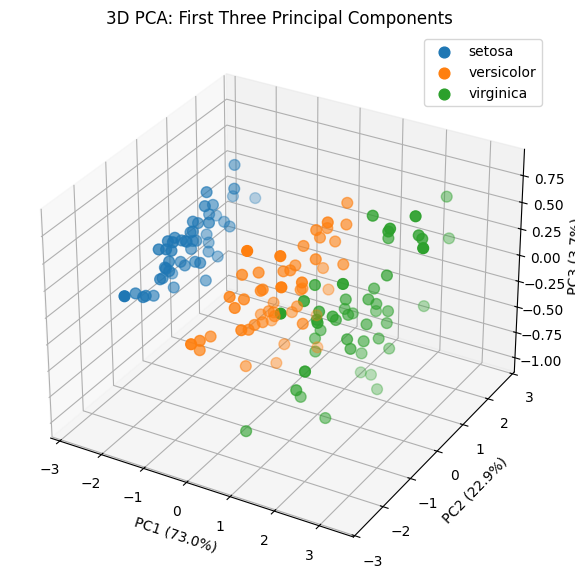

In [71]:
# Write your code from here
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from mpl_toolkits.mplot3d import Axes3D  # for 3D plotting

# Load Iris dataset
iris = sns.load_dataset('iris')
features = ['sepal_length', 'sepal_width', 'petal_length', 'petal_width']

# Standardize features
X = iris[features]
X_scaled = StandardScaler().fit_transform(X)

# Task 1: PCA with 2 components
pca_2 = PCA(n_components=2)
pcs_2 = pca_2.fit_transform(X_scaled)

# Create DataFrame for 2D plot
pca_2_df = pd.DataFrame(data=pcs_2, columns=['PC1', 'PC2'])
pca_2_df['species'] = iris['species']

# Plot first two principal components
plt.figure(figsize=(8, 6))
sns.scatterplot(data=pca_2_df, x='PC1', y='PC2', hue='species', palette='bright')
plt.title('PCA: First Two Principal Components')
plt.xlabel(f'PC1 ({pca_2.explained_variance_ratio_[0]*100:.1f}% Variance)')
plt.ylabel(f'PC2 ({pca_2.explained_variance_ratio_[1]*100:.1f}% Variance)')
plt.grid(True)
plt.show()

# Task 2: Explained variance by each component
pca_full = PCA(n_components=4)
pca_full.fit(X_scaled)

plt.figure(figsize=(7, 5))
plt.bar(range(1, 5), pca_full.explained_variance_ratio_*100, color='teal', alpha=0.7)
plt.xlabel('Principal Component')
plt.ylabel('Explained Variance (%)')
plt.title('Explained Variance by Principal Components')
plt.xticks(range(1, 5))
plt.ylim(0, 100)
plt.grid(axis='y')
plt.show()

# Task 3: PCA with 3 components and 3D visualization
pca_3 = PCA(n_components=3)
pcs_3 = pca_3.fit_transform(X_scaled)
pca_3_df = pd.DataFrame(data=pcs_3, columns=['PC1', 'PC2', 'PC3'])
pca_3_df['species'] = iris['species']

fig = plt.figure(figsize=(9, 7))
ax = fig.add_subplot(111, projection='3d')

for species in pca_3_df['species'].unique():
    subset = pca_3_df[pca_3_df['species'] == species]
    ax.scatter(subset['PC1'], subset['PC2'], subset['PC3'], label=species, s=60)

ax.set_title('3D PCA: First Three Principal Components')
ax.set_xlabel(f'PC1 ({pca_3.explained_variance_ratio_[0]*100:.1f}%)')
ax.set_ylabel(f'PC2 ({pca_3.explained_variance_ratio_[1]*100:.1f}%)')
ax.set_zlabel(f'PC3 ({pca_3.explained_variance_ratio_[2]*100:.1f}%)')
ax.legend()
plt.show()
    

**Statistical Analysis in EDA**<br>

Objective: Calculate basic statistical metrics and explore the relationship between features using correlation and covariance.<br>

Title: Descriptive Statistics<br>

Task 1: Calculate mean, median, and standard deviation of petal length.<br>
Task 2: Calculate skewness and kurtosis of sepal width.<br>
Task 3: Calculate mean, median, and standard deviation of sepal length.

In [72]:
# Write your code from here
import pandas as pd
from scipy.stats import skew, kurtosis
import seaborn as sns

# Load dataset
iris = sns.load_dataset('iris')
feature = iris['sepal_length']

# Basic stats
mean_val = feature.mean()
median_val = feature.median()
std_dev = feature.std()
variance = feature.var()
min_val = feature.min()
max_val = feature.max()
skewness = skew(feature)
kurt = kurtosis(feature)

print(f"Mean: {mean_val:.2f}")
print(f"Median: {median_val:.2f}")
print(f"Standard Deviation: {std_dev:.2f}")
print(f"Variance: {variance:.2f}")
print(f"Minimum: {min_val:.2f}")
print(f"Maximum: {max_val:.2f}")
print(f"Skewness: {skewness:.2f}")
print(f"Kurtosis: {kurt:.2f}")


Mean: 5.84
Median: 5.80
Standard Deviation: 0.83
Variance: 0.69
Minimum: 4.30
Maximum: 7.90
Skewness: 0.31
Kurtosis: -0.57


Title: Correlation & Covariance<br>

Task 1: Compute correlation between sepal length and petal length.<br>
Task 2: Compute covariance between petal width and sepal width.<br>
Task 3: Determine the most correlated pair of features.<br>

In [73]:
# Write your code from here
import seaborn as sns
import pandas as pd

# Load dataset
iris = sns.load_dataset('iris')

# Task 1: Correlation between sepal length and petal length
corr_sepal_petal_length = iris['sepal_length'].corr(iris['petal_length'])

# Task 2: Covariance between petal width and sepal width
cov_petal_width_sepal_width = iris['petal_width'].cov(iris['sepal_width'])

# Task 3: Find most correlated pair of features (excluding self-correlation)
corr_matrix = iris.corr().abs()  # absolute values for magnitude
# Fill diagonal with zero to ignore self-correlation
for col in corr_matrix.columns:
    corr_matrix.loc[col, col] = 0
max_corr = corr_matrix.unstack().sort_values(ascending=False).drop_duplicates().head(1)

print(f"Correlation between sepal length and petal length: {corr_sepal_petal_length:.3f}")
print(f"Covariance between petal width and sepal width: {cov_petal_width_sepal_width:.3f}")
print("\nMost correlated pair of features:")
print(max_corr)


ValueError: could not convert string to float: 'setosa'